In [1]:

# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install the required dependencies
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16748, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 16748 (delta 156), reused 159 (delta 78), pack-reused 16459
Receiving objects: 100% (16748/16748), 15.44 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (11455/11455), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-p

In [22]:
!unzip -q dataset.zip

In [20]:
# delete dir not empty
#!rm -rf dataset

In [37]:
!python yolov5/train.py --img 480 --batch 8 --epochs 60 --data custom_dataset.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name custom_yolo

2024-07-09 12:27:21.513122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 12:27:21.513178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 12:27:21.514852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=custom_dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=8, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, de

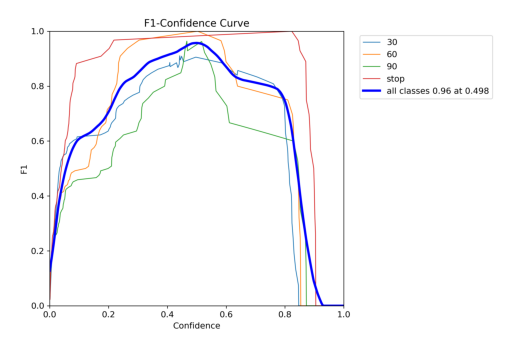

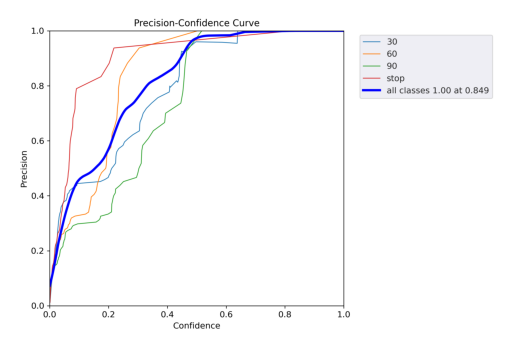

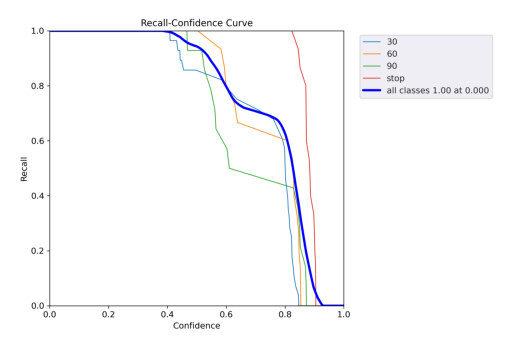

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image from a file
img = mpimg.imread('/content/yolov5/runs/train/custom_yolo2/F1_curve.png')
img2 = mpimg.imread('/content/yolov5/runs/train/custom_yolo2/P_curve.png')
img3 = mpimg.imread('/content/yolov5/runs/train/custom_yolo2/R_curve.png')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()
plt.imshow(img3)
plt.axis('off')
plt.show()


In [35]:
!python yolov5/val.py --data custom_dataset.yaml --weights yolov5/runs/train/custom_yolo6/weights/best.pt --img 480

val: data=/content/yolov5/data/custom_dataset.yaml, weights=['yolov5/runs/train/custom_yolo6/weights/best.pt'], batch_size=32, imgsz=480, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-338-gff063284 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/labels/val.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:03<00:00,  1.65s/it]
                   all         60         72      0.984      0.991      0.995      0.807
                    30         60         28      0.995      0.964      0.994      0.

In [33]:
!python yolov5/detect.py --weights yolov5/runs/train/custom_yolo2/weights/best.pt --img 480 --conf 0.1 --source /content/dataset/images/test/60_150.png

detect: weights=['yolov5/runs/train/custom_yolo2/weights/best.pt'], source=/content/dataset/images/test/60_150.png, data=yolov5/data/coco128.yaml, imgsz=[480, 480], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-338-gff063284 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dataset/images/test/60_150.png: 480x480 1 30, 1 90, 7.9ms
Speed: 0.5ms pre-process, 7.9ms inference, 615.4ms NMS per image at shape (1, 3, 480, 480)
Results saved to yolov5/runs/detect/exp7


In [36]:
# Testing
!python yolov5/val.py --data test_dataset.yaml --weights yolov5/runs/train/custom_yolo6/weights/best.pt --img 480

val: data=/content/yolov5/data/test_dataset.yaml, weights=['yolov5/runs/train/custom_yolo6/weights/best.pt'], batch_size=32, imgsz=480, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-338-gff063284 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/labels/test.cache... 32 images, 0 backgrounds, 0 corrupt: 100% 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.53s/it]
                   all         32         32      0.749      0.625      0.733      0.606
                    30         32          8      0.565      0.875      0.896      0.7